In [1]:
import pandas as pd # Dataset manipulation
import numpy as np # Dataset manipulation
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt # Visualization
from sklearn.model_selection import train_test_split # Splitting data into training and test sets
from sklearn.metrics import accuracy_score # Measures the accuracy of the model
from sklearn import metrics # Scores the performance of the model
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

In [2]:
diab_data = pd.read_csv("../../Data/Diabetes_Archive/diabetes_prediction_dataset.csv")

<h1 align="center"> Examining Different Machine Learning Models Effectiveness in Recognizing Diabetes.</h1>

## Introduction
The goal of this project is to examine different classification models and their performance in classifiying whether an individual has diabetes or not. The models used are Naive-Bayes, Random Forest, and XGBoost. Before starting to fit the data into model, the data is explored for pronounced correlation between the features and response variable.

## Data
The data is sourced from kaggle. The dataset contains 100,000 observations. It contains eight features relating to an individuals health.
- Age is an important factor as diabetes is more commonly diagnosed in older adults. Age ranges from 0-80 in our dataset.
- Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.
- Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.
- Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.
    - not current: individuals who used to smoke but are currently not smoking
    - former: individuals who used to smoke but have been abstinent for a long period of time.
    - No Info: smoking history is unknown
    - current: individuals who currently smoke
    - never: individuals who have never smoked
    - ever: individuals who have at one point been a smoker.
- BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55.
    - Less than 18.5 is underweight
    - 18.5-24.9 is normal
    - 25-29.9 is overweight
    - 30 or more is obese.
- HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.
- Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

The response variable diabetes holds binary values to determine whether an individual has diabetes (1) or not (0).

## Exploratory Data Analysis

In [3]:
diab_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diab_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
diab_distribution = diab_data['diabetes'].value_counts()/len(diab_data)
diab_distribution

0    0.915
1    0.085
Name: diabetes, dtype: float64

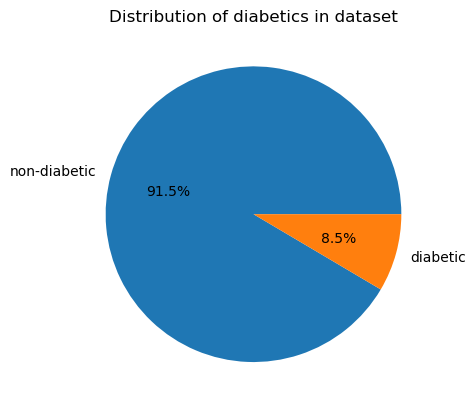

In [7]:
plt.pie(diab_distribution, labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()

This shows that more than 90% percent of individuals recorded for the study don't have diabetes. Our main goal is to build a model that accurately predicts if an individual has diabetes or not. Thus, an unbalanced dataset like this will lead to the model having bias towards the non-diabetic label. To counter this we can simply reduce the number of non-diabetic observations we will use in our model. I've chosen to reduce it to 8,500 observations of non-diabetics so that the disparity isn't as high.

In [8]:
neg_diab = diab_data[diab_data['diabetes']==0].sample(8500)
pos_diab = diab_data[diab_data['diabetes']==1]
balanced_dataset = pd.concat([neg_diab,pos_diab],axis=0)
balanced_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
16150,Male,30.0,0,0,never,27.32,3.5,155,0
24487,Male,47.0,0,0,never,43.22,6.1,155,0
62911,Male,50.0,0,0,current,22.75,5.8,159,0
84191,Female,31.0,0,0,No Info,31.07,6.1,126,0
35568,Female,16.0,0,0,No Info,25.23,6.5,126,0


In [9]:
balanced_dataset['gender_num'] = pd.Categorical(balanced_dataset['gender']).codes
balanced_dataset['smoking_history_num'] = pd.Categorical(balanced_dataset['smoking_history']).codes

In [10]:
corr_df = balanced_dataset.corr()
corr_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_num,smoking_history_num
age,1.000000,0.252698,0.251822,0.274838,0.299591,0.273443,0.492666,0.004698,0.244591
hypertension,0.252698,1.000000,0.101867,0.155174,0.159407,0.137251,0.257362,0.013379,0.109287
heart_disease,0.251822,0.101867,1.000000,0.055647,0.127775,0.113077,0.210922,0.096085,0.034643
bmi,0.274838,0.155174,0.055647,1.000000,0.198841,0.184384,0.344631,-0.041002,0.185018
HbA1c_level,0.299591,0.159407,0.127775,0.198841,1.000000,0.319317,0.601629,0.042684,0.112718
blood_glucose_level,0.273443,0.137251,0.113077,0.184384,0.319317,1.000000,0.536354,0.031898,0.093076
diabetes,0.492666,0.257362,0.210922,0.344631,0.601629,0.536354,1.000000,0.063925,0.183602
gender_num,0.004698,0.013379,0.096085,-0.041002,0.042684,0.031898,0.063925,1.000000,-0.066150
smoking_history_num,0.244591,0.109287,0.034643,0.185018,0.112718,0.093076,0.183602,-0.066150,1.000000


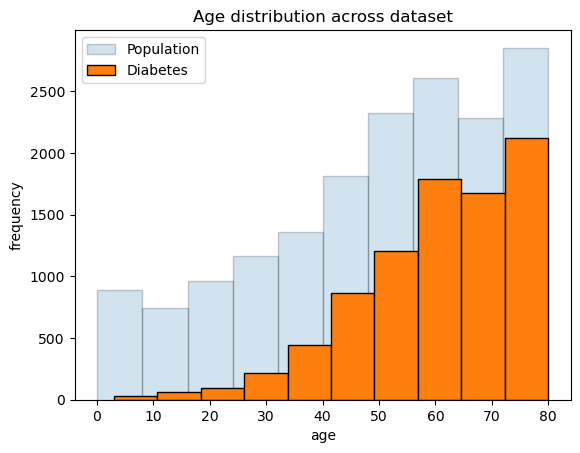

In [11]:
plt.hist(balanced_dataset['age'],histtype='bar',alpha=0.2, bins=10, ec = 'black',label="Population");
plt.hist(pos_diab['age'], histtype='bar', ec = 'black', bins=10,label="Diabetes")
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Age distribution across dataset')
plt.legend(loc='best')

There is a clear positive correlation between age and the likelihood that an individual is diabetic.

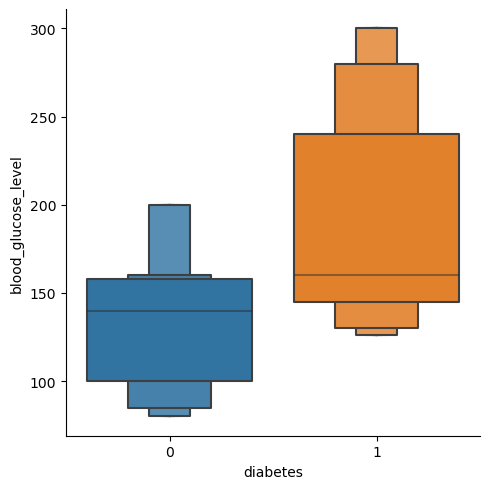

In [12]:
sns.catplot(data=balanced_dataset,x="diabetes",
            y="blood_glucose_level",kind="boxen")

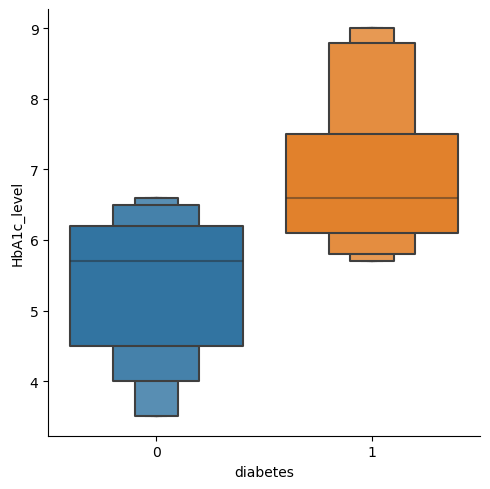

In [13]:
sns.catplot(data=balanced_dataset,x="diabetes",y="HbA1c_level",kind="boxen")

In [14]:
#plt.hist(balanced_dataset['bmi'],histtype='bar',alpha=0.2, ec = 'black',label="Population");
#plt.hist(pos_diab['bmi'], histtype='bar', ec = 'black',label="Diabetes")
#plt.xlabel('bmi')
#plt.ylabel('frequency')
#plt.title('BMI distribution across dataset')
#plt.legend(loc='best')

In [15]:
#plt.hist(balanced_dataset['HbA1c_level'],histtype='bar',alpha=0.2, ec = 'black', label="Population");
#plt.hist(pos_diab['HbA1c_level'], histtype='bar', ec = 'black',label="Diabetes")
#plt.xlabel('HbA1c_level')
#plt.ylabel('frequency')
#plt.title('HbA1c_level distribution across dataset')
#plt.legend(loc='best')

In [16]:
#plt.hist(balanced_dataset['blood_glucose_level'],histtype='bar',alpha=0.2, ec = 'black', label="Population");
#plt.hist(pos_diab['blood_glucose_level'], histtype='bar', ec = 'black',label="Diabetes")
#plt.xlabel('blood_glucose_level')
#plt.ylabel('frequency')
#plt.title('blood_glucose_level distribution across dataset')
#plt.legend(loc='best')

## Model fitting and predictions

### 1) Naive Bayes

In [17]:
balanced_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_num,smoking_history_num
16150,Male,30.0,0,0,never,27.32,3.5,155,0,1,4
24487,Male,47.0,0,0,never,43.22,6.1,155,0,1,4
62911,Male,50.0,0,0,current,22.75,5.8,159,0,1,1
84191,Female,31.0,0,0,No Info,31.07,6.1,126,0,0,0
35568,Female,16.0,0,0,No Info,25.23,6.5,126,0,0,0


In [20]:
column_index = np.array([1,2,3,5,6,7,9,10])
features = balanced_dataset.iloc[:,column_index]
response = balanced_dataset['diabetes']
X_train, X_test, y_train, y_test = train_test_split(features, response,
                                                    random_state=42)

In [21]:
from sklearn.naive_bayes import BernoulliNB
bern_model = BernoulliNB()
bern_model.fit(X_train, y_train)
y_pred = bern_model.predict(X_test)
print("Accuracy of model: ", accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_pred, y_test))

Accuracy of model:  0.6451764705882352
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2391
           1       0.58      0.66      0.62      1859

    accuracy                           0.65      4250
   macro avg       0.64      0.65      0.64      4250
weighted avg       0.65      0.65      0.65      4250



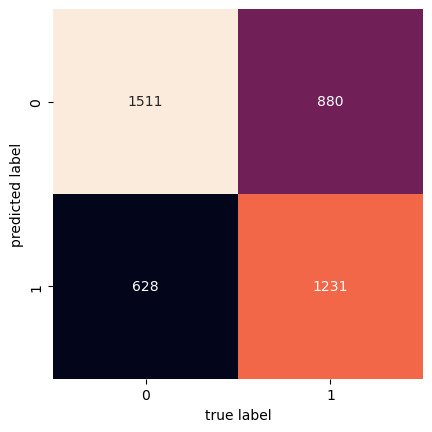

In [22]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 2) Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
ypred = rf_model.predict(X_test)
print("Accuracy of model: ", accuracy_score(y_test, ypred))
print(metrics.classification_report(ypred, y_test))

Accuracy of model:  0.908235294117647
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2129
           1       0.91      0.91      0.91      2121

    accuracy                           0.91      4250
   macro avg       0.91      0.91      0.91      4250
weighted avg       0.91      0.91      0.91      4250



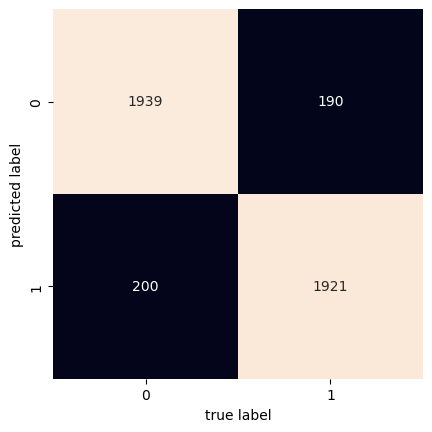

In [26]:
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

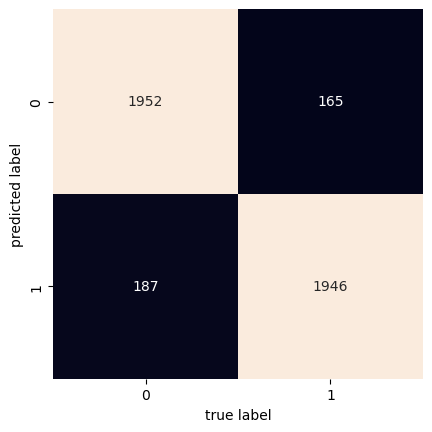

In [28]:
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 3) XGBoost

In [27]:
from xgboost import XGBClassifier
xbg_model = XGBClassifier(n_estimators=1000, learning_rate=0.05,n_jobs=4,
                          early_stopping_rounds=5)
xbg_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=False)
predictions = xbg_model.predict(X_test)
print("Accuracy of model: ", accuracy_score(y_test, predictions))
print(metrics.classification_report(ypred, predictions))

Accuracy of model:  0.9171764705882353
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2129
           1       0.96      0.96      0.96      2121

    accuracy                           0.96      4250
   macro avg       0.96      0.96      0.96      4250
weighted avg       0.96      0.96      0.96      4250

